# Lab Practice 1
### A. Boyko, E. Gladin

## Test iris dataset for mean difference of features for each pair of classes.

### $H_0 : E(X_1) = E(X_2)$
### $H_1 : E(X_1) <\neq> E(X_2)$
#### where $X_1$ and $X_2$ are the same feature(e.g.sepal length) from two classes respectively(e.g. setosa and virginica)

In [131]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as st
from sklearn import datasets
from itertools import combinations
from arch.bootstrap import IIDBootstrap
import seaborn as sns
from permute.core import two_sample
%matplotlib inline

#### Load dataset. No further processing is needed, as the data is well-normalized already.

In [129]:
data = datasets.load_iris()

#### Also load dataset from iris to plot pairplot easily

In [133]:
sns_data = sns.load_dataset("iris")

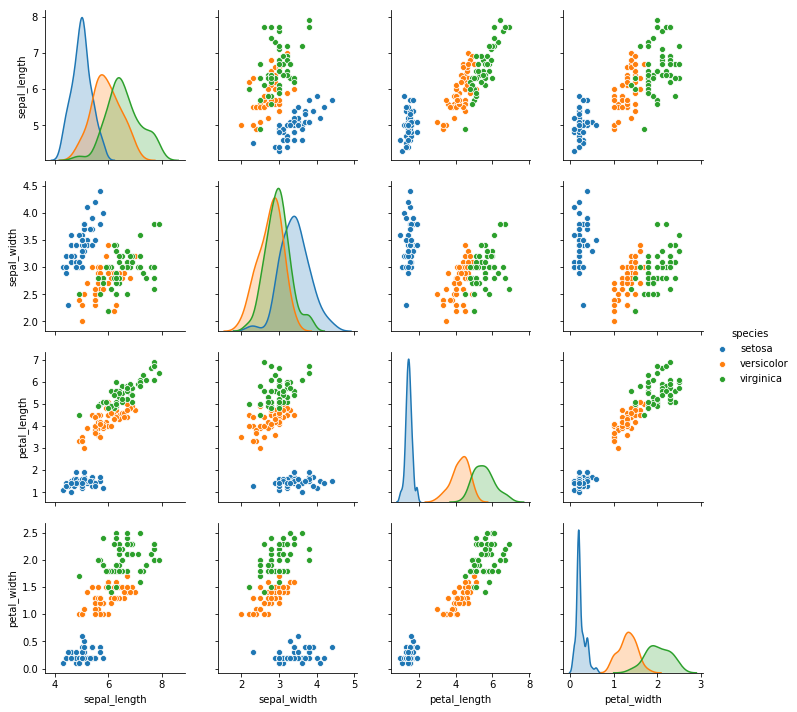

In [134]:
pairplot = sns.pairplot(sns_data, hue="species")

#### It can be noted on the pairplot that versicolor and virginica have similar sepal width. Other features differ significantly between classes.

#### Let's check features distribution for normality via Shapiro-Wilk criteria:

In [145]:
setosa = sns_data.loc[sns_data['species'] == 'setosa'] 
versicolor = sns_data.loc[sns_data['species'] == 'versicolor'] 
virginica = sns_data.loc[sns_data['species'] == 'virginica']
 
for feature in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']: 
    print(st.shapiro(setosa.loc[:, feature].to_numpy()))

for feature in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']: 
    print(st.shapiro(versicolor.loc[:, feature].to_numpy()))

for feature in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']: 
    print(st.shapiro(virginica.loc[:, feature].to_numpy()))

(0.9776989221572876, 0.4595281183719635)
(0.97171950340271, 0.2715264856815338)
(0.9549766182899475, 0.05481043830513954)
(0.7997642159461975, 8.65842082475865e-07)
(0.9778355956077576, 0.46473264694213867)
(0.9741330742835999, 0.33798879384994507)
(0.9660047888755798, 0.1584833413362503)
(0.947626531124115, 0.027278218418359756)
(0.9711798429489136, 0.25832483172416687)
(0.9673910140991211, 0.1809043288230896)
(0.9621862769126892, 0.10977369546890259)
(0.9597718715667725, 0.08695744723081589)


#### For two of the twelve distributions the normality is rejected at significance level 0.05. Thus, using t-test is not preferred. But the t-test statistic relies on the mean, which by the CLT is approximately normal. This approximation is weak, as sample size is only 50. We will use the t-test, but only as a side method. 

In [135]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [136]:
#split data for each class
data_0 = data['data'][0:50]
data_1 = data['data'][50:100]
data_2= data['data'][100:150]

#### Let's bootstrap feature distribution for every pair of classes separately (because our samples are not linked) and take the means for both. This method only requires that samples are i.i.d., which holds. Then, we plot the difference between means. Title notation holds as follows: e.g. "difference betw. means of sepal length of virginica and versicolor" states that mean sepal length of versicolor is subtracted from mean sepal length of virginica. Note that the alternative is in this case one-sided.
#### We also use two-sample permutational criteria as it requires no assumptions.
#### We also use two-sample t-test, as for most of samples the normality is not rejected by Shapiro-Wilk, and the central limit theorem gives an approximation for normality of mean anyway (and mean is what the statistic is related on).

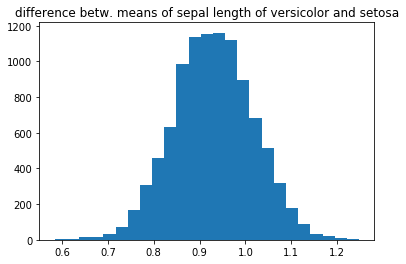

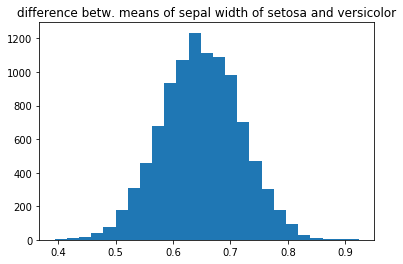

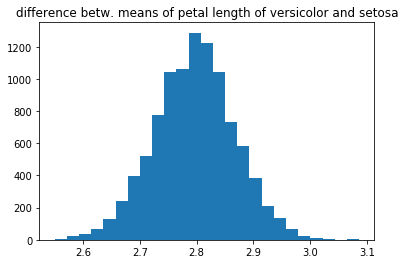

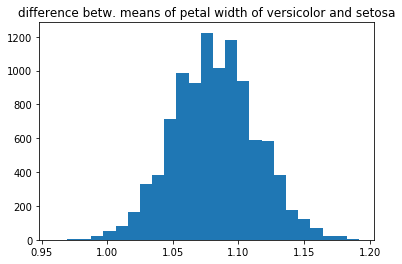

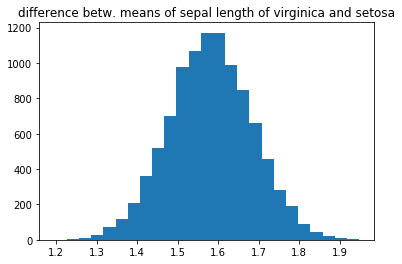

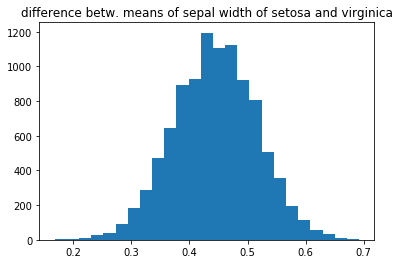

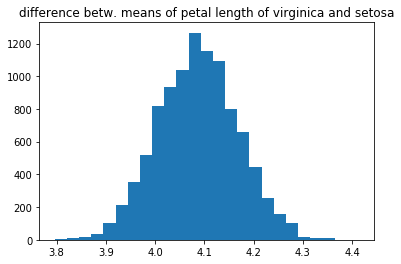

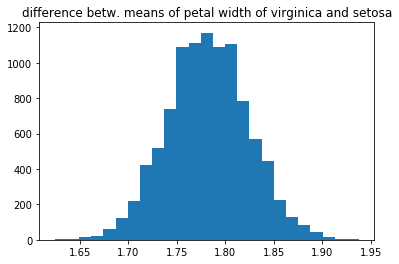

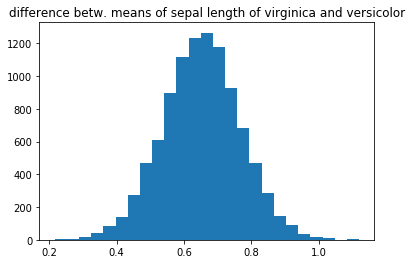

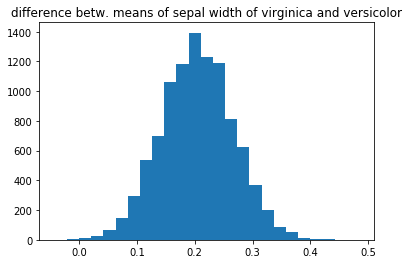

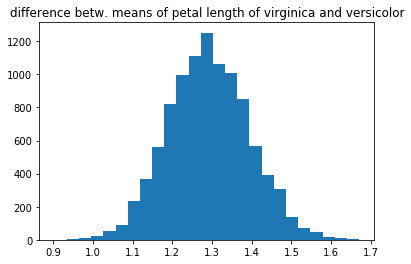

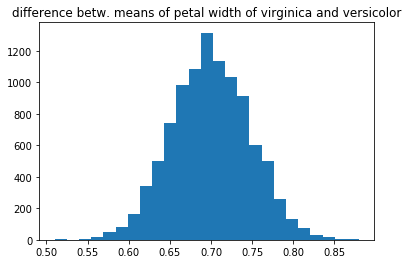

In [141]:
label_dict = {0: 'setosa', 1:'versicolor', 2:'virginica'}
feature_dict = {0: 'sepal length', 1: "sepal width", 2: 'petal length', 3: 'petal width'}
data_list = [data_0, data_1, data_2]

p_vals_b = {} #estimated bootstrap p-values
p_vals_perm = {}#p-values for permutatuinal criteria
p_vals_t = {}#p-values for t-test
diffs = {}
def func(y):
    return y.mean(0)

for labels in combinations(label_dict.keys(), 2):
    labels = list(labels)
    for feature in feature_dict.keys():
        p_vals_perm[feature_dict[feature]+" of "+label_dict[labels[0]]+" and "+label_dict[labels[1]]] = \
        two_sample([d[feature] for d in data_list[labels[0]]],\
                   [d[feature] for d in data_list[labels[1]]], alternative='two-sided',\
                   stat='mean', reps = 10000)[0] #permutational criteria
        
        p_vals_t[feature_dict[feature]+" of "+label_dict[labels[0]]+" and "+label_dict[labels[1]]] = \
        two_sample([d[feature] for d in data_list[labels[0]]],\
                   [d[feature] for d in data_list[labels[1]]], alternative='two-sided',\
                   stat='t', reps = 10000)[0] #t-test
        
        bs_0 = IIDBootstrap(np.array([d[feature] for d in data_list[labels[0]]]))
        bs_1 = IIDBootstrap(np.array([d[feature] for d in data_list[labels[1]]]))

        results_0 = bs_0.apply(func, 10000)
        results_1 = bs_1.apply(func, 10000)
        if results_0.mean() < results_1.mean(): 
            #the bootstrap criteria is one-sided, so we make sure to subtract
            #the smaller values from larger values not to get the p-value around 1:
            results_0 = -results_0
            results_1 = -results_1
            labels[0], labels[1] = labels[1], labels[0]
        plt.hist(results_0-results_1, bins=25)
        plt.title("difference betw. means of "+feature_dict[feature]+" of "+label_dict[labels[0]]+" and "+label_dict[labels[1]])
        plt.show()
        
        subzero = 0
        for i in results_0 - results_1:
            if i < 0:
                subzero += 1
                
        p_vals_b[feature_dict[feature]+" of "+label_dict[labels[0]]+" and "+label_dict[labels[1]]] = \
            subzero/len(results_0-results_1)
        diffs[feature_dict[feature]+" of "+label_dict[labels[0]]+" and "+label_dict[labels[1]]] = \
            (results_0-results_1).mean()


#### Let's look at the mean differences from bootstrap:

In [146]:
diffs

{'petal length of versicolor and setosa': 2.7961506000000003,
 'petal length of virginica and setosa': 4.086992,
 'petal length of virginica and versicolor': 1.2917534000000002,
 'petal width of versicolor and setosa': 1.0821734,
 'petal width of virginica and setosa': 1.7820904,
 'petal width of virginica and versicolor': 0.6998734000000001,
 'sepal length of versicolor and setosa': 0.9306324,
 'sepal length of virginica and setosa': 1.581141,
 'sepal length of virginica and versicolor': 0.6517515999999998,
 'sepal width of setosa and versicolor': 0.6488807999999999,
 'sepal width of setosa and virginica': 0.4442281999999999,
 'sepal width of virginica and versicolor': 0.20440620000000004}

#### Perform multitest with Holm's significance level correction for p-values from  bootstrap, permutation criteria and t-test: null hypothesis is that the mean features are same between classes.

In [147]:
from statsmodels.stats.multitest import multipletests
rejected = multipletests(list(p_vals_b.values()), method='holm')[0]
rejected

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [148]:
from statsmodels.stats.multitest import multipletests
rejected = multipletests(list(p_vals_perm.values()), method='holm')[0]
rejected

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [149]:
from statsmodels.stats.multitest import multipletests
rejected = multipletests(list(p_vals_t.values()), method='holm')[0]
rejected

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

#### As we can see, all null hypothesis are rejected, as expected.